In [1]:
from pathlib import Path

In [2]:
images_dir = Path('datasets/animal_images')
images_dir

WindowsPath('datasets/animal_images')

In [3]:
cats = list(images_dir.glob('cat/*'))
cats[:5]

[WindowsPath('datasets/animal_images/cat/cat_1.jpeg'),
 WindowsPath('datasets/animal_images/cat/cat_10.jpeg'),
 WindowsPath('datasets/animal_images/cat/cat_100.jpeg'),
 WindowsPath('datasets/animal_images/cat/cat_11.jpeg'),
 WindowsPath('datasets/animal_images/cat/cat_12.jpeg')]

In [4]:
from PIL import Image

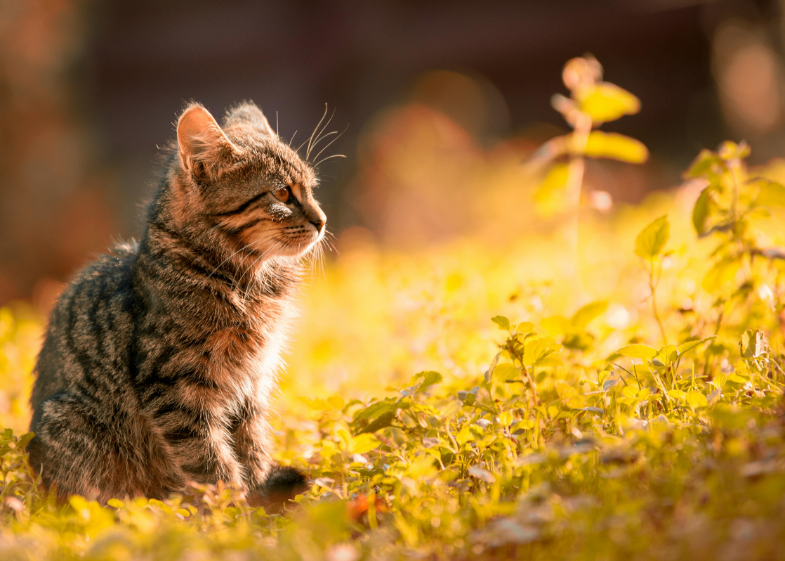

In [5]:
Image.open(str(cats[3]))

In [6]:
from cv2 import imread, resize

In [7]:
animal_images = {
    'cats': list(images_dir.glob('cat/*')),
    'dogs': list(images_dir.glob('dog/*')),
    'monkeys': list(images_dir.glob('monkey/*')),
    'cows': list(images_dir.glob('cow/*')),
    'birds': list(images_dir.glob('bird/*')),
}

In [8]:
bird0 = imread(str(animal_images['birds'][0]))
bird0.shape

(2787, 4413, 3)

In [9]:
bird0

array([[[152, 144, 121],
        [154, 146, 123],
        [155, 147, 124],
        ...,
        [108,  99,  65],
        [108,  99,  65],
        [108,  99,  65]],

       [[152, 144, 121],
        [154, 146, 123],
        [155, 147, 124],
        ...,
        [108,  99,  65],
        [108,  99,  65],
        [108,  99,  65]],

       [[152, 144, 121],
        [154, 146, 123],
        [155, 147, 124],
        ...,
        [108,  99,  65],
        [108,  99,  65],
        [108,  99,  65]],

       ...,

       [[229, 215, 193],
        [229, 215, 193],
        [229, 215, 193],
        ...,
        [222, 201, 179],
        [222, 201, 179],
        [222, 201, 179]],

       [[229, 215, 193],
        [229, 215, 193],
        [229, 215, 193],
        ...,
        [222, 201, 179],
        [222, 201, 179],
        [222, 201, 179]],

       [[229, 215, 193],
        [229, 215, 193],
        [229, 215, 193],
        ...,
        [222, 201, 179],
        [222, 201, 179],
        [222, 201, 179]]

In [10]:
labels = {
    'cats': 0,
    'dogs': 1,
    'monkeys': 2,
    'cows': 3,
    'birds': 4,
}

In [11]:
features, target = [], []

for animal_type, img_paths in animal_images.items():
    for img_path in img_paths:
        img = imread(img_path)
        img_resized = resize(img, (150, 150))
        features.append(img_resized)
        target.append(labels[animal_type])

In [12]:
target[95:105]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [13]:
features[:5]

[array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  4],
         [ 0,  1,  4],
         [ 0,  0,  4]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  7]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  8]],
 
        ...,
 
        [[19, 33, 55],
         [10, 25, 51],
         [10, 25, 51],
         ...,
         [32, 43, 59],
         [28, 38, 52],
         [23, 34, 41]],
 
        [[30, 45, 71],
         [ 9, 23, 45],
         [17, 30, 54],
         ...,
         [44, 52, 67],
         [16, 25, 36],
         [ 3,  5, 15]],
 
        [[30, 45, 70],
         [ 2, 16, 38],
         [ 9, 23, 45],
         ...,
         [40, 54, 67],
         [21, 28, 36],
         [ 5,  6, 12]]], dtype=uint8),
 array([[[201, 199, 198],
         [197, 1

In [14]:
import numpy as np

In [15]:
features = np.array(features)
target = np.array(target)

In [16]:
target[95:105]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
features[:5]

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   4],
         [  0,   1,   4],
         [  0,   0,   4]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   4],
         [  0,   0,   4],
         [  0,   0,   7]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   4],
         [  0,   0,   4],
         [  0,   0,   8]],

        ...,

        [[ 19,  33,  55],
         [ 10,  25,  51],
         [ 10,  25,  51],
         ...,
         [ 32,  43,  59],
         [ 28,  38,  52],
         [ 23,  34,  41]],

        [[ 30,  45,  71],
         [  9,  23,  45],
         [ 17,  30,  54],
         ...,
         [ 44,  52,  67],
         [ 16,  25,  36],
         [  3,   5,  15]],

        [[ 30,  45,  70],
         [  2,  16,  38],
         [  9,  23,  45],
         ...,
         [ 40,  54,  67],
        

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
len(X_train), len(X_test)

(350, 88)

In [20]:
X_train[:5]

array([[[[  8,  73,  51],
         [  7,  86,  62],
         [  5, 108,  77],
         ...,
         [ 33, 103,  90],
         [ 31, 102,  89],
         [ 29,  98,  85]],

        [[  8,  74,  55],
         [  7,  87,  62],
         [  7, 105,  78],
         ...,
         [ 36, 103,  88],
         [ 33,  99,  88],
         [ 35,  97,  85]],

        [[  7,  75,  58],
         [  7,  86,  62],
         [  8, 100,  73],
         ...,
         [ 33, 100,  85],
         [ 32,  98,  86],
         [ 30,  94,  82]],

        ...,

        [[  8,  61,  52],
         [  7,  62,  45],
         [ 10,  73,  51],
         ...,
         [ 84, 207, 167],
         [ 80, 209, 170],
         [ 54, 194, 153]],

        [[  4,  56,  46],
         [  4,  56,  39],
         [  9,  67,  49],
         ...,
         [ 68, 201, 158],
         [ 59, 199, 158],
         [ 54, 195, 154]],

        [[  4,  53,  46],
         [  9,  52,  41],
         [ 11,  59,  46],
         ...,
         [ 58, 195, 153],
        

In [21]:
X_train = X_train/255
X_test = X_test/255
X_train[:5]

array([[[[0.03137255, 0.28627451, 0.2       ],
         [0.02745098, 0.3372549 , 0.24313725],
         [0.01960784, 0.42352941, 0.30196078],
         ...,
         [0.12941176, 0.40392157, 0.35294118],
         [0.12156863, 0.4       , 0.34901961],
         [0.11372549, 0.38431373, 0.33333333]],

        [[0.03137255, 0.29019608, 0.21568627],
         [0.02745098, 0.34117647, 0.24313725],
         [0.02745098, 0.41176471, 0.30588235],
         ...,
         [0.14117647, 0.40392157, 0.34509804],
         [0.12941176, 0.38823529, 0.34509804],
         [0.1372549 , 0.38039216, 0.33333333]],

        [[0.02745098, 0.29411765, 0.22745098],
         [0.02745098, 0.3372549 , 0.24313725],
         [0.03137255, 0.39215686, 0.28627451],
         ...,
         [0.12941176, 0.39215686, 0.33333333],
         [0.1254902 , 0.38431373, 0.3372549 ],
         [0.11764706, 0.36862745, 0.32156863]],

        ...,

        [[0.03137255, 0.23921569, 0.20392157],
         [0.02745098, 0.24313725, 0.17647059]

In [22]:
import tensorflow

In [23]:
cnn = tensorflow.keras.Sequential([
    # feature extraction
    tensorflow.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(),
    tensorflow.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(),
    # classification
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(16, activation='relu'),
    tensorflow.keras.layers.Dense(5, activation='softmax'),
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10);

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.2093 - loss: 2.0091
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.2837 - loss: 1.5281
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.3879 - loss: 1.4331
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.4966 - loss: 1.3502
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.5812 - loss: 1.1532
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.6586 - loss: 0.9604
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.7512 - loss: 0.7988
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.7370 - loss: 0.7305
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.8960 - loss: 0.4305
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9292 - loss: 0.3223


In [25]:
y_predicted = cnn.predict(X_test)
y_predicted

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[8.41710508e-01, 1.20130787e-02, 5.09156696e-02, 5.60282841e-02,
        3.93325128e-02],
       [1.55372545e-01, 1.80387404e-02, 1.88886444e-03, 5.27619990e-03,
        8.19423556e-01],
       [2.45005867e-05, 8.25627893e-03, 8.00216019e-01, 1.89729393e-01,
        1.77374121e-03],
       [3.59967142e-01, 3.30304980e-01, 7.79575855e-02, 1.36826813e-01,
        9.49435383e-02],
       [4.73868608e-01, 9.01114047e-02, 5.24308756e-02, 3.35094213e-01,
        4.84949015e-02],
       [1.89034581e-01, 3.50502014e-01, 4.57394384e-02, 2.24345788e-01,
        1.90378159e-01],
       [9.80579630e-02, 4.40422326e-01, 1.96853653e-01, 2.18165904e-01,
        4.65001650e-02],
       [6.10178411e-01, 1.09943375e-01, 9.52626392e-02, 8.40401277e-02,
        1.00575574e-01],
       [1.00949071e-02, 2.73395032e-01, 9.53540504e-02, 1.13423504e-02,
        6.09813690e-01],
       [3.14385829e-07, 6.68609748e-03, 9.59445238e-01, 3.37562710e-02,
        1.12072230e-04],
       [1.67114511e-01, 2.8486

In [26]:
predictions = []

for score in y_predicted:
    predictions.append(np.argmax(score))

print(predictions)

[0, 4, 2, 0, 0, 1, 1, 0, 4, 2, 4, 0, 4, 0, 2, 3, 0, 4, 3, 3, 3, 4, 4, 1, 0, 0, 3, 1, 4, 3, 3, 3, 2, 0, 1, 3, 0, 0, 1, 0, 4, 2, 1, 4, 0, 0, 0, 4, 3, 4, 0, 2, 0, 0, 4, 1, 3, 4, 1, 2, 0, 4, 0, 2, 4, 0, 0, 2, 3, 1, 0, 4, 0, 4, 4, 4, 2, 0, 0, 2, 3, 4, 3, 1, 4, 0, 4, 3]


In [27]:
print(y_test[80:88])

[3 1 3 1 4 0 4 3]


In [28]:
print(predictions[80:88])

[3, 4, 3, 1, 4, 0, 4, 3]
